In [2]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('nn_transformed.csv')

# Convert to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Extract date from datetime
df['Date'] = df['Time'].dt.date

# Convert dBA values to squared sound pressure values
df['Pressure_Squared'] = 10 ** (df['Value'] / 10)

# Group by date and room and calculate the mean squared sound pressure
grouped = df.groupby(['Date', 'Room'])
LAeq_list = []

for (date, room), group in grouped:
    mean_pressure_squared = group['Pressure_Squared'].mean()
    LAeq = 10 * np.log10(mean_pressure_squared)
    LAeq_list.append({'Date': date, 'Room': room, 'L_Aeq': LAeq})

# Convert the results to a new DataFrame
result_df = pd.DataFrame(LAeq_list)

# Display or save the result
print(result_df)
result_df.to_csv('LAeq_results.csv', index=False)



           Date  Room      L_Aeq
0    2023-06-02     1  39.000000
1    2023-06-02     2  57.881131
2    2023-06-02     3  56.650822
3    2023-06-03     1  39.000000
4    2023-06-03     2  58.581124
..          ...   ...        ...
172  2023-07-29     2  56.451236
173  2023-07-29     3  56.461788
174  2023-07-30     1  39.000000
175  2023-07-30     2  67.698664
176  2023-07-30     3  56.666980

[177 rows x 3 columns]


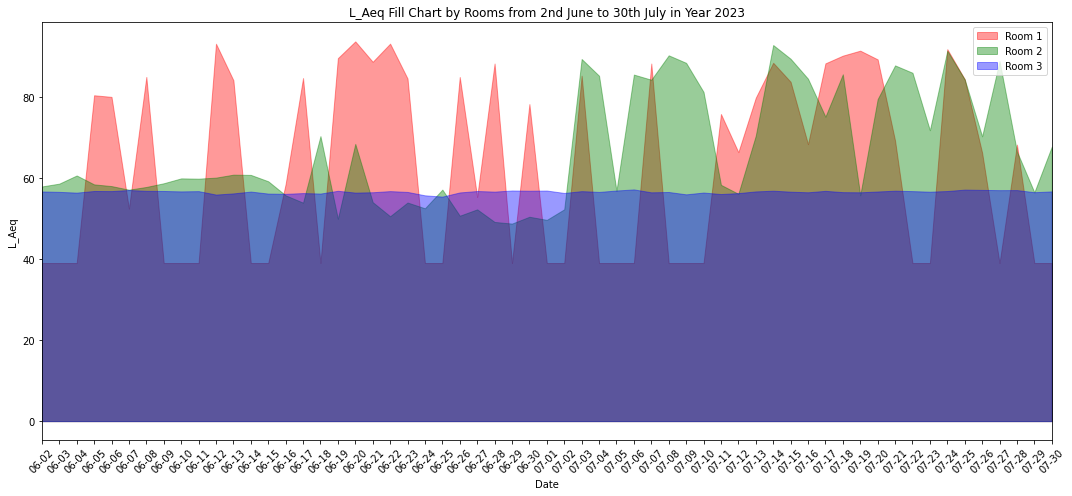

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
df = pd.read_csv('LAeq_results.csv')

# Convert the 'Date' column to datetime type for plotting
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataframe by 'Room' and 'Date' to ensure correctness of the plot
df = df.sort_values(by=['Room', 'Date'])

# Set colors (can be adjusted as needed)
colors = {1: 'red', 2: 'green', 3: 'blue'}

plt.figure(figsize=(15,7))
ax = plt.gca()  # Get the current axis

# Specify that the x-axis contains dates
ax.xaxis_date()

# Set the date interval. For instance, show a date every 5 days.
locator = mdates.DayLocator(interval=1)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim(pd.Timestamp('2023-06-02'), pd.Timestamp('2023-07-30'))

# Plot an area chart for each Room
for room, color in colors.items():
    subset = df[df['Room'] == room]
    plt.fill_between(subset['Date'], subset['L_Aeq'], color=color, alpha=0.4, label=f"Room {room}")

plt.xticks(rotation=45)

plt.title("L_Aeq Fill Chart by Rooms from 2nd June to 30th July in Year 2023")
plt.xlabel("Date")
plt.ylabel("L_Aeq")
plt.legend()
plt.tight_layout()  # Adjust the layout to make sure everything fits
plt.show()



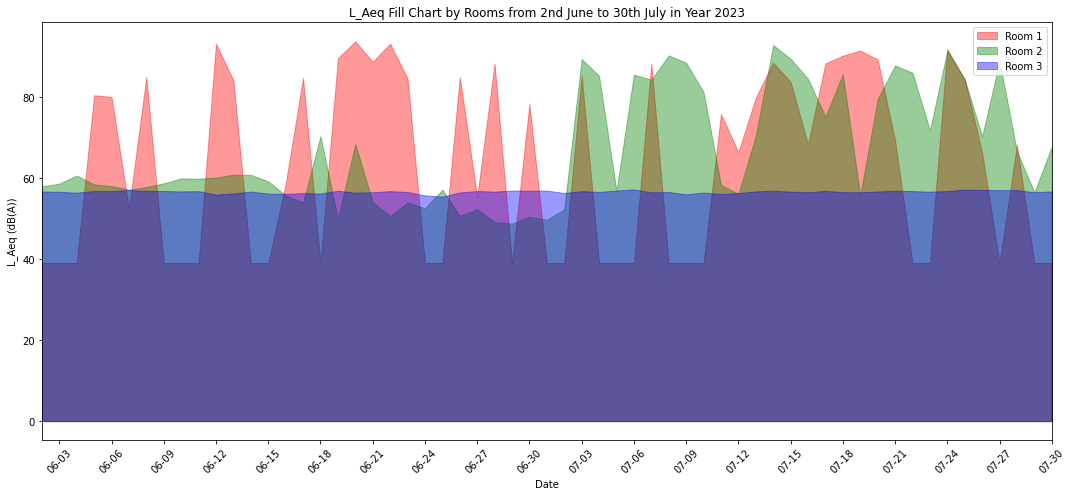

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
df = pd.read_csv('LAeq_results.csv')

# Convert the 'Date' column to datetime type for plotting
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataframe by 'Room' and 'Date' to ensure the plot's correctness
df = df.sort_values(by=['Room', 'Date'])

# Define colors (can be adjusted if needed)
colors = {1: 'red', 2: 'green', 3: 'blue'}

plt.figure(figsize=(15,7))
ax = plt.gca()  # Get the current axis

# Specify that the x-axis contains dates
ax.xaxis_date()

# Set the date interval. For example, display a date every 3 days.
locator = mdates.DayLocator(interval=3)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim(pd.Timestamp('2023-06-02'), pd.Timestamp('2023-07-30'))

# Plot an area chart for each 'Room'
for room, color in colors.items():
    subset = df[df['Room'] == room]
    plt.fill_between(subset['Date'], subset['L_Aeq'], color=color, alpha=0.4, label=f"Room {room}")

plt.xticks(rotation=45)

plt.title("L_Aeq Fill Chart by Rooms from 2nd June to 30th July in Year 2023")
plt.xlabel("Date")
plt.ylabel("L_Aeq (dB(A))")
plt.legend()
plt.tight_layout()  # Adjust the layout to make sure everything fits well
plt.savefig("noiselevelfill.png")  # Save the plot as an image
plt.show()



<Figure size 432x288 with 0 Axes>